# Python Lab Exercise #2

## Objectives:

- Load .csv files into `pandas` DataFrames
- Describe and manipulate data in Series and DataFrames
- Visualize data using DataFrame methods and `matplotlib`

![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2880px-Pandas_logo.svg.png)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## What is Pandas?

Pandas, as [the Anaconda docs](https://docs.anaconda.com/anaconda/packages/py3.7_osx-64/) tell us, offers us "High-performance, easy-to-use data structures and data analysis tools." It's something like "Excel for Python", but it's quite a bit more powerful.

Let's read in the heart dataset.

Pandas has many methods for reading different types of files. Note that here we have a .csv file.

Read about this dataset [here](https://www.kaggle.com/ronitf/heart-disease-uci).

In [13]:
# loading the data from the database python.db
con = sqlite3.connect('heart.csv')
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,survival,censors,age
0,15.0,1.0,54.3
1,3.0,1.0,40.4
2,624.0,1.0,51.0
3,46.0,1.0,42.5
4,127.0,1.0,48.0


The output of the `.to_sql()` function is a pandas *DataFrame*, which has a familiar tabaular structure of rows and columns.

In [14]:
type(heart_df)

pandas.core.frame.DataFrame

## DataFrames and Series

Two main types of pandas objects are the DataFrame and the Series, the latter being in effect a single column of the former:

In [16]:
age_series = heart_df['age']
type(age_series)

pandas.core.series.Series

Notice how we can isolate a column of our DataFrame simply by using square brackets together with the name of the column.

Both Series and DataFrames have an *index* as well:

In [17]:
heart_df.index

RangeIndex(start=0, stop=69, step=1)

In [18]:
age_series.index

RangeIndex(start=0, stop=69, step=1)

Pandas is built on top of NumPy, and we can always access the NumPy array underlying a DataFrame using `.values`.

In [19]:
heart_df.values

array([[1.500e+01, 1.000e+00, 5.430e+01],
       [3.000e+00, 1.000e+00, 4.040e+01],
       [6.240e+02, 1.000e+00, 5.100e+01],
       [4.600e+01, 1.000e+00, 4.250e+01],
       [1.270e+02, 1.000e+00, 4.800e+01],
       [6.400e+01, 1.000e+00, 5.460e+01],
       [1.350e+03, 1.000e+00, 5.410e+01],
       [2.800e+02, 1.000e+00, 4.950e+01],
       [2.300e+01, 1.000e+00, 5.690e+01],
       [1.000e+01, 1.000e+00, 5.530e+01],
       [1.024e+03, 1.000e+00, 4.340e+01],
       [3.900e+01, 1.000e+00, 4.280e+01],
       [7.300e+02, 1.000e+00, 5.840e+01],
       [1.360e+02, 1.000e+00, 5.200e+01],
       [1.775e+03, 0.000e+00, 3.330e+01],
       [1.000e+00, 1.000e+00, 5.420e+01],
       [8.360e+02, 1.000e+00, 4.500e+01],
       [6.000e+01, 1.000e+00, 6.450e+01],
       [1.536e+03, 0.000e+00, 4.900e+01],
       [1.549e+03, 0.000e+00, 4.060e+01],
       [5.400e+01, 1.000e+00, 4.900e+01],
       [4.700e+01, 1.000e+00, 6.150e+01],
       [1.000e+00, 1.000e+00, 4.150e+01],
       [5.100e+01, 1.000e+00, 5.05

## Basic DataFrame Attributes and Methods

### `.head()`

In [20]:
# complete the python code here
heart_df.head()


,survival,censors,age
0,15.0,1.0,54.3
1,3.0,1.0,40.4
2,624.0,1.0,51.0
3,46.0,1.0,42.5
4,127.0,1.0,48.0


### `.tail()`

In [21]:
# complete the python code here
heart_df.tail()


,survival,censors,age
64,14.0,1.0,40.3
65,167.0,0.0,26.7
66,110.0,0.0,23.7
67,13.0,0.0,28.9
68,1.0,0.0,35.2


### `.info()`

In [22]:
# complete the python code here
heart_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survival  69 non-null     float64
 1   censors   69 non-null     float64
 2   age       69 non-null     float64
dtypes: float64(3)
memory usage: 1.7 KB


### `.describe()`

In [23]:
# complete the python code here
heart_df.describe()


,survival,censors,age
count,69.000000,69.000000,69.000000
mean,376.797101,0.652174,46.134783
std,458.362000,0.479770,8.874846
min,1.000000,0.000000,19.700000
25%,47.000000,0.000000,42.500000
50%,147.000000,1.000000,48.000000
75%,592.000000,1.000000,52.200000
max,1775.000000,1.000000,64.500000


### `.dtypes`

In [24]:
# complete the python code here
heart_df.dtypes


survival    float64
censors     float64
age         float64
dtype: object

### `.shape`

In [25]:
# complete the python code here
heart_df.shape


(69, 3)

### Exploratory Plots

Let's make ourselves a histogram of ages:

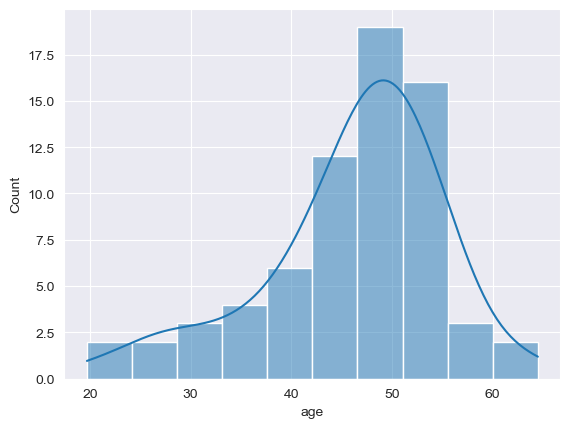

In [27]:
sns.set_style('darkgrid')
sns.histplot(data=heart_df['age'], kde=True)
plt.show()
# For more recent versions of seaborn:
# sns.histplot(data=heart_df['age'], kde=True);

And while we're at it let's do a scatter plot of maximum heart rate vs. age:

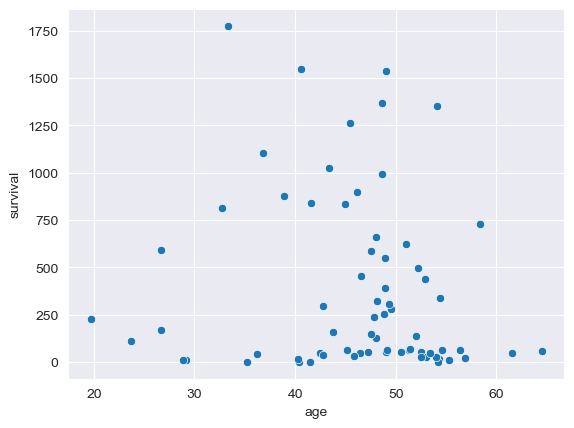

In [89]:
sns.scatterplot(x=heart_df['age'], y=heart_df['survival'])
plt.show()

## Adding to a DataFrame

### Adding Rows

Here are two rows that our engineer accidentally left out of the .csv file, expressed as a Python dictionary:

In [30]:
extra_rows = {'age': [40, 30], 
              'sex': [1, 0], 
              'cp': [0, 0], 
              'trestbps': [120, 130],
              'chol': [240, 200],
              'fbs': [0, 0], 
              'restecg': [1, 0], 
              'thalach': [120, 122], 
              'exang': [0, 1],
              'oldpeak': [0.1, 1.0], 
              'slope': [1, 1], 
              'ca': [0, 1], 
              'thal': [2, 3],
              'target': [0, 0]}
extra_rows

{'age': [40, 30],
 'sex': [1, 0],
 'cp': [0, 0],
 'trestbps': [120, 130],
 'chol': [240, 200],
 'fbs': [0, 0],
 'restecg': [1, 0],
 'thalach': [120, 122],
 'exang': [0, 1],
 'oldpeak': [0.1, 1.0],
 'slope': [1, 1],
 'ca': [0, 1],
 'thal': [2, 3],
 'target': [0, 0]}

How can we add this to the bottom of our dataset?

In [31]:
# Let's first turn this into a DataFrame.
# We can use the .from_dict() method.

missing = pd.DataFrame(extra_rows)
missing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
1,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


In [33]:
# Now we just need to concatenate the two DataFrames together.
# Note the `ignore_index` parameter! We'll set that to True.
# complete the python code here

heart_augmented = pd.concat([heart_df, missing], ignore_index=True)

In [34]:
heart_augmented.tail()# Let's check the end to make sure we were successful!
# complete the python code here

heart_augmented.tail()

,survival,censors,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
66,110.0,0.0,23.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,13.0,0.0,28.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,1.0,0.0,35.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,40.0,1.0,0.0,120.0,240.0,0.0,1.0,120.0,0.0,0.1,1.0,0.0,2.0,0.0
70,NaN,NaN,30.0,0.0,0.0,130.0,200.0,0.0,0.0,122.0,1.0,1.0,1.0,1.0,3.0,0.0


### Adding Columns

Adding a column is very easy in `pandas`. Let's add a new column to our dataset called "test", and set all of its values to 0.

In [35]:
heart_augmented['test'] = 0

In [36]:
heart_augmented.head()

,survival,censors,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test
0,15.0,1.0,54.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3.0,1.0,40.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,624.0,1.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,46.0,1.0,42.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,127.0,1.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


I can also add columns whose values are functions of existing columns.

Suppose I want to add the cholesterol column ("chol") to the resting systolic blood pressure column ("trestbps"):

In [37]:
# complete the python code here

heart_augmented['combined'] = heart_augmented['chol'] + heart_augmented['trestbps']



In [38]:
heart_augmented.head()

,survival,censors,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,combined
0,15.0,1.0,54.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,3.0,1.0,40.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,624.0,1.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,46.0,1.0,42.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,127.0,1.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


## Filtering

We can use filtering techniques to see only certain rows of our data. If we wanted to see only the rows for patients 70 years of age or older, we can simply type:

In [48]:

heart_augmented['age'] = pd.to_numeric(heart_augmented['age'], errors='coerce')


In [49]:
heart_augmented['age'] >= 70

0     False
1     False
2     False
3     False
4     False
      ...  
66    False
67    False
68    False
69    False
70    False
Name: age, Length: 71, dtype: bool

In [50]:
heart_augmented[heart_augmented['age'] >= 70]

,survival,censors,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,combined


Use '&' for "and" and '|' for "or".

### Exercise

Display the patients who are 70 or over as well as the patients whose trestbps score is greater than 170.

In [52]:
patients_over_70 = heart_augmented[heart_augmented['age'] >= 70]
print(f"Number of patients aged 70 or older: {patients_over_70.shape[0]}")

Number of patients aged 70 or older: 0


In [54]:
# complete the python code here

at_risk = heart_augmented[(heart_augmented['age'] >= 70) | (heart_augmented['trestbps'] > 170)]
at_risk

,survival,censors,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,combined


### Exploratory Plot

Using the subframe we just made, let's make a scatter plot of their cholesterol levels vs. age and color by sex:

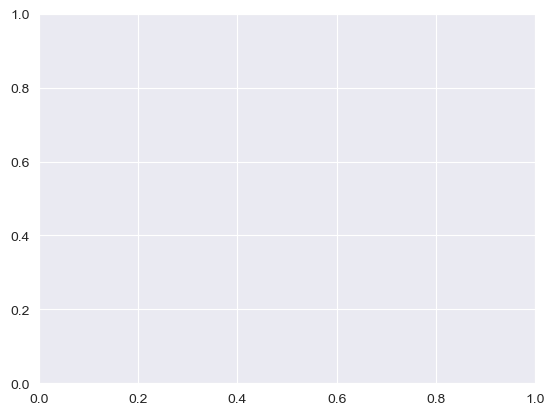

In [66]:
# complete the python code here
sns.scatterplot(data=at_risk, x='age', y='chol', hue='sex');
plt.show()

### `.loc` and `.iloc`

We can use `.loc` to get, say, the first ten values of the age and resting blood pressure ("trestbps") columns:

In [60]:
heart_augmented.loc

In [61]:
heart_augmented.loc[:9, ['age', 'trestbps']]

,age,trestbps
0,54.3,NaN
1,40.4,NaN
2,51.0,NaN
3,42.5,NaN
4,48.0,NaN
5,54.6,NaN
6,54.1,NaN
7,49.5,NaN
8,56.9,NaN
9,55.3,NaN


`.iloc` is used for selecting locations in the DataFrame **by number**:

In [62]:
heart_augmented.iloc

In [63]:
heart_augmented.iloc[3, 0]

46.0

In [64]:
heart_augmented.head()

,survival,censors,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,combined
0,15.0,1.0,54.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,3.0,1.0,40.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,624.0,1.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,46.0,1.0,42.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,127.0,1.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### Exercise

How would we get the same slice as just above by using .iloc() instead of .loc()?

In [67]:
# complete the python code here
heart_augmented.iloc[:10, [0, 3]]


,survival,sex
0,15.0,NaN
1,3.0,NaN
2,624.0,NaN
3,46.0,NaN
4,127.0,NaN
5,64.0,NaN
6,1350.0,NaN
7,280.0,NaN
8,23.0,NaN
9,10.0,NaN


## Statistics

### `.mean()`

In [68]:
# complete the python code here
heart_augmented.mean()



survival    376.797101
censors       0.652174
age          45.821127
sex           0.500000
cp            0.000000
trestbps    125.000000
chol        220.000000
fbs           0.000000
restecg       0.500000
thalach     121.000000
exang         0.500000
oldpeak       0.550000
slope         1.000000
ca            0.500000
thal          2.500000
target        0.000000
test          0.000000
combined    345.000000
dtype: float64

Be careful! Some of these will are not straightforwardly interpretable. What does an average "sex" of 0.682 mean?

### `.min()`

In [69]:
# complete the python code here
heart_augmented.min()


survival      1.0
censors       0.0
age          19.7
sex           0.0
cp            0.0
trestbps    120.0
chol        200.0
fbs           0.0
restecg       0.0
thalach     120.0
exang         0.0
oldpeak       0.1
slope         1.0
ca            0.0
thal          2.0
target        0.0
test          0.0
combined    330.0
dtype: float64

### `.max()`

In [70]:
# complete the python code here
heart_augmented.max()


survival    1775.0
censors        1.0
age           64.5
sex            1.0
cp             0.0
trestbps     130.0
chol         240.0
fbs            0.0
restecg        1.0
thalach      122.0
exang          1.0
oldpeak        1.0
slope          1.0
ca             1.0
thal           3.0
target         0.0
test           0.0
combined     360.0
dtype: float64

## Series Methods

### `.value_counts()`

How many different values does slope have? What about sex? And target?

In [71]:
heart_augmented['slope'].value_counts()

1.0    2
Name: slope, dtype: int64

In [72]:
heart_augmented['sex'].value_counts()

1.0    1
0.0    1
Name: sex, dtype: int64

### `.sort_values()`

In [73]:
heart_augmented['age'].sort_values()

41    19.7
66    23.7
65    26.7
46    26.7
67    28.9
      ... 
47    56.4
8     56.9
12    58.4
21    61.5
17    64.5
Name: age, Length: 71, dtype: float64

## `pandas`-Native Plotting

The `.plot()` and `.hist()` methods available for DataFrames use a wrapper around `matplotlib`:

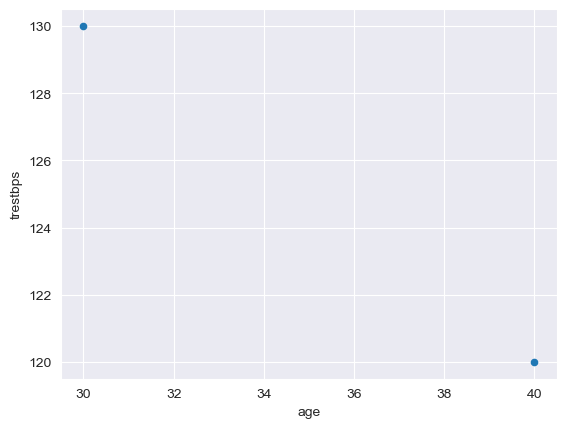

In [74]:
heart_augmented.plot(x='age', y='trestbps', kind='scatter');

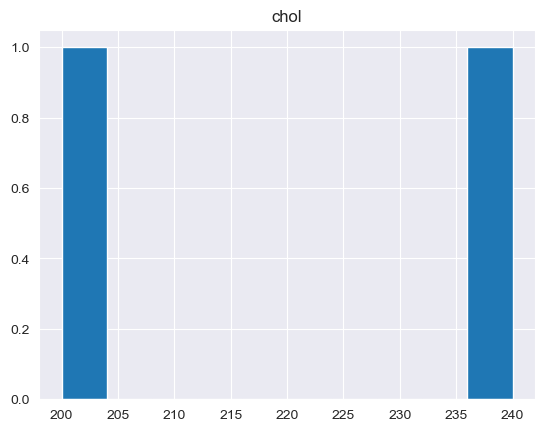

In [75]:
heart_augmented.hist(column='chol');

### Exercises

1. Make a bar plot of "age" vs. "slope" for the `heart_augmented` DataFrame.

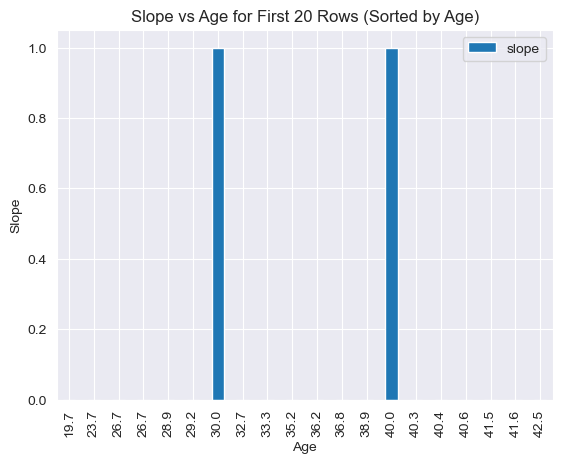

In [81]:
# complete the python code here

heart_augmented_sorted = heart_augmented.sort_values(by='age')
heart_augmented_sorted.head(20).plot(x='age', y='slope', kind='bar')
plt.title('Slope vs Age for First 20 Rows (Sorted by Age)')
plt.ylabel('Slope')
plt.xlabel('Age')
plt.show()


2. Make a histogram of ages for **just the men** in `heart_augmented` (heart_augmented['sex']=1).

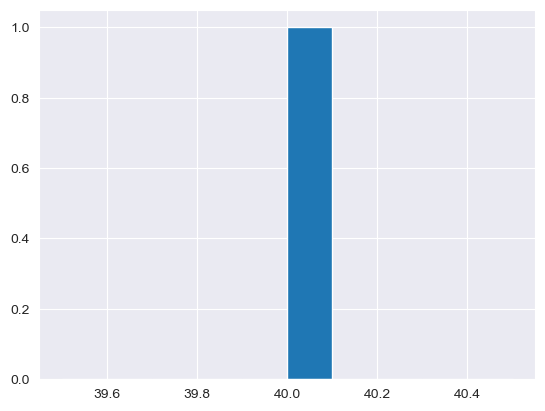

In [78]:
# complete the python code here

heart_augmented[heart_augmented['sex'] == 1]['age'].hist()
plt.show()

3. Make separate scatter plots of cholesterol vs. resting systolic blood pressure for the target=0 and the target=1 groups. Put both plots on the same figure and give each an appropriate title.

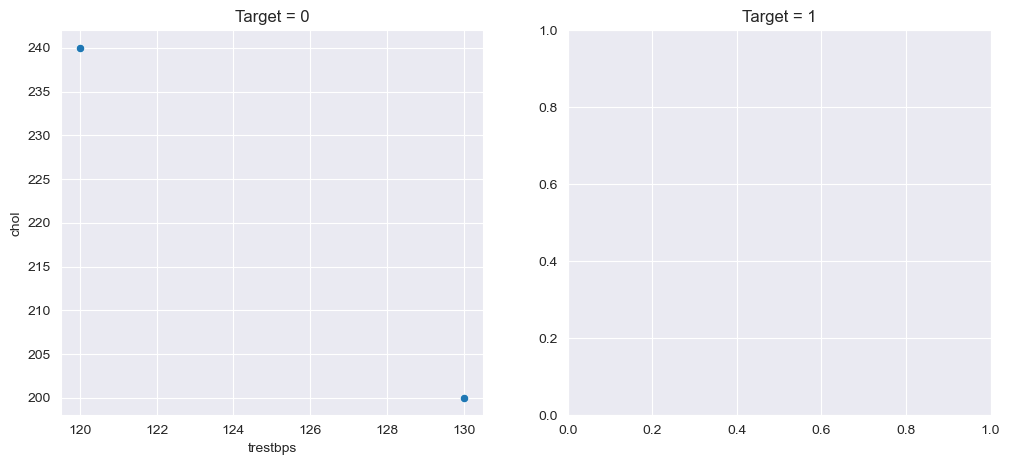

In [84]:
# complete the python code here

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Target = 0')
sns.scatterplot(data=heart_augmented[heart_augmented['target'] == 0], x='trestbps', y='chol')

plt.subplot(1, 2, 2)
plt.title('Target = 1')
sns.scatterplot(data=heart_augmented[heart_augmented['target'] == 1], x='trestbps', y='chol')

plt.show()